In [16]:
# load the libraries
import pandas as pd
import numpy as np

In [2]:
output_width = 1000
#output_width = 80 #//*** Normal Output width
pd.set_option("display.width", output_width)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Load the .XLSX file into Pandas
hotdog_contest_winner_df = pd.read_excel("hotdog-contest-winners.xlsx",header=0)
hotdog_places_df = pd.read_excel("hotdog-places.xlsx",header=0)
obama_approval_ratings_df = pd.read_excel("obama-approval-ratings.xls",header=0)

In [4]:
# Changing the index of the dataframe
# hotdog_contest_winner_df.set_index('Year', inplace=True)
hotdog_contest_winner_df

,Year,Winner,Dogs eaten,Country,New record
0,1980,Paul Siederman & Joe Baldini,9.10,United States,0
1,1981,Thomas DeBerry,11.00,United States,0
2,1982,Steven Abrams,11.00,United States,0
3,1983,Luis Llamas,19.50,Mexico,0
4,1984,Birgit Felden,9.50,Germany,0
5,1985,Oscar Rodriguez,11.75,United States,0
6,1986,Mark Heller,15.50,United States,0
7,1987,Don Wolfman,12.00,United States,0
8,1988,Jay Green,14.00,United States,0
9,1989,Jay Green,13.00,United States,0


In [19]:
hotdog_places_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,25,50.0,50.5,44.5,53.5,49,54,66,59,68.0,54
1,24,31.0,26.0,30.5,38.0,37,52,63,59,64.5,43
2,22,23.5,25.5,29.5,32.0,32,37,49,42,55.0,37


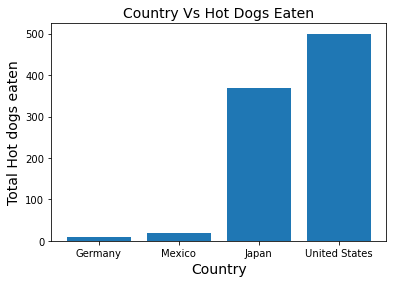

In [33]:
import matplotlib.pyplot as plt
# Bar Plot showing total hot dog eaten
agg_country = hotdog_contest_winner_df[['Country', 'Dogs eaten']].groupby(['Country']).sum().sort_values('Dogs eaten')
plt.bar(agg_country.index,
        agg_country['Dogs eaten'])
plt.title('Country Vs Hot Dogs Eaten', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Hot dogs eaten', fontsize=14)
plt.show()


In [42]:
# Stacked bar chart

# agg_country_yr = hotdog_contest_winner_df.groupby(['Country','Year'])['Dogs eaten'].sum().unstack().fillna(0)
agg_country_yr = hotdog_contest_winner_df.groupby(['Country','New record'])['Dogs eaten'].sum().unstack().fillna(0)
agg_country_yr


New record,0,1
Country,,
Germany,9.5,0.00
Japan,112.5,257.38
Mexico,19.5,0.00
United States,322.1,177.75


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Germany'),
  Text(1, 0, 'Japan'),
  Text(2, 0, 'Mexico'),
  Text(3, 0, 'United States')])

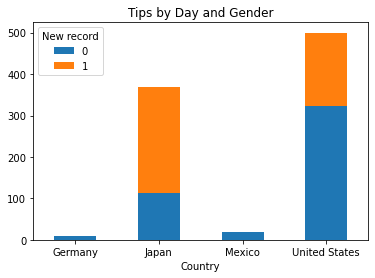

In [43]:
from matplotlib import pyplot as plt

# Very simple one-liner using our agg_tips DataFrame.
agg_country_yr.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Tips by Day and Gender')
plt.xticks(rotation=0, ha='center')


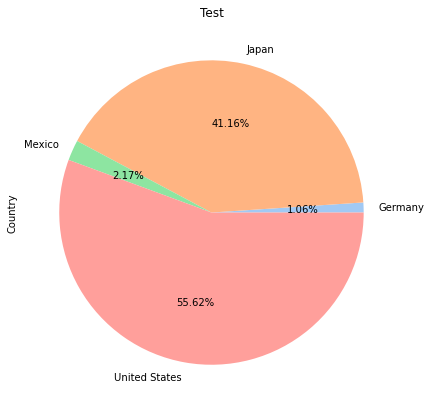

In [67]:
# create a pie chart using matplotlib

#define data
data = hotdog_contest_winner_df[['Country', 'Dogs eaten']].groupby(['Country']).sum()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:4]

fig = plt.figure(figsize=(10, 7))
#create pie chart
plt.pie(x=data["Dogs eaten"], labels=data.index, colors = colors, autopct='%.2f%%')

plt.ylabel("Country")
plt.title("Test")
# ax.set(title="Nested pie chart")
plt.show()


,Dogs eaten
Country,
Germany,9.50
Japan,369.88
Mexico,19.50
United States,499.85
